In [56]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [59]:
csvDir = "data_chicago_hackathon_2024/probe_data/0"

csvFiles = [f for f in os.listdir(csvDir) if f.endswith('.csv')]
csvFilesSubset = csvFiles[:2] #testing with like 2
dataframes = [pd.read_csv(os.path.join(csvDir, f)) for f in csvFiles]
probe_data = pd.concat(dataframes, ignore_index=True)
probe_data

,Unnamed: 0,heading,latitude,longitude,traceid,sampledate,speed
0,0,269.0,53.551038,9.966550,sTw9llY1TgK0Tvexr6rqxw,2024-07-11 13:06:30,37.0
1,1,269.0,53.551038,9.966380,sTw9llY1TgK0Tvexr6rqxw,2024-07-11 13:06:31,37.0
2,2,270.0,53.551039,9.966240,sTw9llY1TgK0Tvexr6rqxw,2024-07-11 13:06:32,35.0
3,3,270.0,53.551040,9.966060,sTw9llY1TgK0Tvexr6rqxw,2024-07-11 13:06:33,33.0
4,4,270.0,53.551041,9.965950,sTw9llY1TgK0Tvexr6rqxw,2024-07-11 13:06:34,33.0
...,...,...,...,...,...,...,...
10731896,379507,269.0,53.551718,9.956793,DX9ZKiHbSAiyIzssTuSG5Q,2024-07-14 13:52:47,13.0
10731897,379508,268.0,53.551717,9.956753,DX9ZKiHbSAiyIzssTuSG5Q,2024-07-14 13:52:48,8.0
10731898,379509,267.0,53.551717,9.956728,DX9ZKiHbSAiyIzssTuSG5Q,2024-07-14 13:52:49,5.0
10731899,379510,267.0,53.551716,9.956711,DX9ZKiHbSAiyIzssTuSG5Q,2024-07-14 13:52:50,4.0


In [58]:
probe_data.head()
print(probe_data.isnull().sum())

probe_data.dropna(inplace=True)

features = probe_data[['latitude', 'longitude', 'heading', 'speed']]
features.head()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

epsilon = 0.001  # idk wtf to make this LOL
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_features)
probe_data['cluster'] = clusters
print(f'# clustesr: {len(set(clusters))}')

Unnamed: 0    0
heading       0
latitude      0
longitude     0
traceid       0
sampledate    0
speed         0
dtype: int64
# clustesr: 85678


In [52]:
roundabouts = probe_data[probe_data['cluster'] != -1]

def analyze_Heading(cluster_df):
    heading_changes = np.diff(cluster_df['heading'].values)
    return np.mean(heading_changes)

groupsBob = roundabouts.groupby('cluster')
for cluster_id, cluster_df in groupsBob:
    heading_variation = analyze_Heading(cluster_df)
    print(f'cluster {cluster_id} - its heading: {heading_variation}')

cluster 0 - its heading: 0.0
cluster 1 - its heading: 0.0
cluster 2 - its heading: 0.0
cluster 3 - its heading: 0.0
cluster 4 - its heading: 0.0
cluster 5 - its heading: 0.0
cluster 6 - its heading: 0.0
cluster 7 - its heading: 0.0
cluster 8 - its heading: 0.0
cluster 9 - its heading: 0.0
cluster 10 - its heading: 0.0
cluster 11 - its heading: 0.0
cluster 12 - its heading: 0.0
cluster 13 - its heading: 0.0
cluster 14 - its heading: 0.0
cluster 15 - its heading: 0.0
cluster 16 - its heading: 0.0
cluster 17 - its heading: 0.0
cluster 18 - its heading: 0.0
cluster 19 - its heading: 0.0
cluster 20 - its heading: 0.0
cluster 21 - its heading: 0.0
cluster 22 - its heading: 0.0
cluster 23 - its heading: 0.0
cluster 24 - its heading: 0.0
cluster 25 - its heading: 0.0
cluster 26 - its heading: 0.0
cluster 27 - its heading: 0.0
cluster 28 - its heading: 0.0
cluster 29 - its heading: 0.0
cluster 30 - its heading: 0.0
cluster 31 - its heading: 0.0
cluster 32 - its heading: 0.0
cluster 33 - its hea

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cluster 79246 - its heading: 0.0
cluster 79247 - its heading: 0.0
cluster 79248 - its heading: 0.0
cluster 79249 - its heading: 0.0
cluster 79250 - its heading: 0.0
cluster 79251 - its heading: 0.0
cluster 79252 - its heading: 0.0
cluster 79253 - its heading: 0.0
cluster 79254 - its heading: 0.0
cluster 79255 - its heading: 0.0
cluster 79256 - its heading: 0.0
cluster 79257 - its heading: 0.0
cluster 79258 - its heading: 0.0
cluster 79259 - its heading: 0.0
cluster 79260 - its heading: 0.0
cluster 79261 - its heading: 0.0
cluster 79262 - its heading: 0.0
cluster 79263 - its heading: 0.0
cluster 79264 - its heading: 0.0
cluster 79265 - its heading: 0.0
cluster 79266 - its heading: 0.0
cluster 79267 - its heading: 0.0
cluster 79268 - its heading: 0.0
cluster 79269 - its heading: 0.0
cluster 79270 - its heading: 0.0
cluster 79271 - its heading: 0.0
cluster 79272 - its heading: 0.0
cluster 79273 - its heading: 0.0
cluster 79274 - its heading: 0.0
cluster 79275 - its heading: 0.0
cluster 79

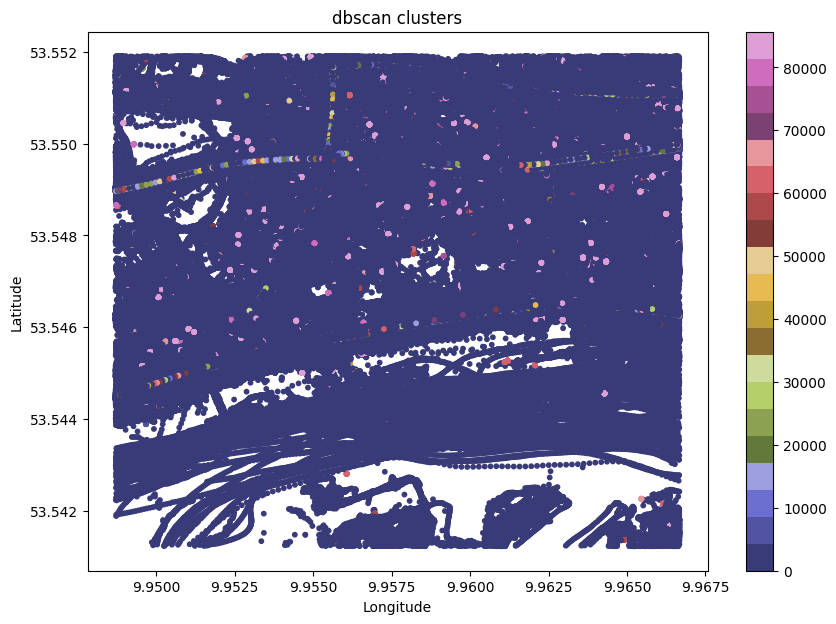

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(probe_data['longitude'], probe_data['latitude'], c=probe_data['cluster'], cmap='tab20b', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('dbscan clusters')
plt.colorbar()
plt.show()